# Communicate Data Findings
by Abdulaziz Alamri

## Contents:
1. [Introduction](#intro)
2. [Data Wrangling](#data_wrang)

    2.1 [Data Gathering](#data_gath)
    
    2.2 [Data Assessment](#data_asses)
    
    2.3 [Data Cleaning](#data_clean) 


3. [Exploratory Data Analysis (EDA)](#eda)

    3.1 [Univariate Exploration](#ue)
    
    3.2 [Bivariate Exploration](#be)
    
    3.3 [Multivariate Exploration](#me)
    

<a id='intro'></a>
## Introduction 


This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# Download the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='data_wrang'></a>
## Data Wrangling 

<a id='data_gath'></a>
### Data Gathering 
The dataset contains 113,937 loans with 81 variables on each loan, such as borrower rate (or interest rate), loan amount and so on.
<br>

In [2]:
# Loading the loans dataset
Loan_Data = pd.read_csv('prosperLoanData.csv')

In [3]:
# overview of data shape and composition
print(Loan_Data.shape)
print(Loan_Data.head(6))

(113937, 81)
                ListingKey  ...  Investors
0  1021339766868145413AB3B  ...        258
1  10273602499503308B223C1  ...          1
2  0EE9337825851032864889A  ...         41
3  0EF5356002482715299901A  ...        158
4  0F023589499656230C5E3E2  ...         20
5  0F05359734824199381F61D  ...          1

[6 rows x 81 columns]


<a id='data_asses'></a>
<br><br><br>
### Data Assessment
**Visual Assessment**:<br><br>
**Loan_Data**:

In [4]:
# To print all the columns 
pd.set_option('display.max_columns', None)

In [5]:
# To prevent the characters truncation 
pd.set_option('max_colwidth', None)

In [6]:
Loan_Data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.0906

<br><br>
**Programmatic Assessment**:
<br><br>
**Loan_Data**:

In [7]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
Loan_Data.sample(15)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
61707,7912356046672687515A9E0,655721,2012-10-17 15:57:06.860000000,NaN,60,Current,NaN,0.23656,0.2118,0.2018,0.18950,0.0649,0.12460,4.0,C,8.0,1,CA,Other,Employed,77.0,False,False,NaN,2012-10-03 21:40:47,660.0,679.0,2001-02-15 00:00:00,4.0,4.0,10.0,3,110.0,0.0,5.0,2.0,220.0,8.0,1.0,0.0,5578.0,0.17,26172.0,7.0,0.75,0.0,0.32,"$1-24,999",True,1000.000000,629C366497943481015900E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,17,76641,5000,2012-10-26 00:00:00,Q4 2012,7D363560005402733D0D35B,135.77,2172.3200,866.44,1305.8800,-61.67,0.00,0.00,0.00,0.00,1.0,0,0,0.0,53
59585,75FE348793358081299901F,465559,2010-07-08 05:12:25.057000000,NaN,36,Defaulted,2012-06-14 00:00:00,0.28574,0.2625,0.2525,0.14630,0.1000,0.14630,3.0,D,7.0,1,TX,Police Officer/Correction Officer,Full-time,201.0,False,False,NaN,2010-07-01 19:41:11,700.0,719.0,1999-11-04 00:00:00,4.0,4.0,18.0,2,30.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,653.0,0.43,847.0,15.0,0.75,0.0,0.24,"$25,000-49,999",True,3259.000000,8E133593333850478420080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203,1.0,44,43394,3500,2010-07-13 00:00:00,Q3 2010,668634878401391034BC6D5,141.48,2546.6400,1409.35,1137.2900,-68.89,-513.00,2090.65,1039.61,833.96,1.0,0,0,0.0,77
63402,8D6C3524413716826F9C823,523393,2011-08-24 08:08:23.640000000,NaN,36,Completed,2012-04-24 00:00:00,0.30532,0.2699,0.2599,0.25340,0.1120,0.14140,3.0,D,5.0,1,GA,Executive,Employed,23.0,False,False,NaN,2011-08-24 08:08:18,740.0,759.0,1995-12-02 00:00:00,12.0,11.0,31.0,12,230.0,3.0,10.0,0.0,0.0,0.0,1.0,0.0,7580.0,0.04,48500.0,26.0,0.92,2.0,0.39,"$25,000-49,999",True,3750.000000,C2C7362877318392508ABBB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,31,52877,10000,2011-08-31 00:00:00,Q3 2011,03D0347742418162305EF56,408.20,11638.2700,10000.00,1638.2700,-60.69,0.00,0.00,0.00,0.00,1.0,0,0,0.0,23
77953,A5973581976709293594496,815627,2013-06-20 07:58:14.780000000,NaN,36,Current,NaN,0.19236,0.1559,0.1459,0.13820,0.0524,0.08580,5.0,B,6.0,1,TX,Computer Programmer,Employed,280.0,True,False,NaN,2013-06-20 07:58:02,700.0,719.0,1989-03-16 00:00:00,14.0,14.0,27.0,9,792.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,35049.0,0.84,5937.0,23.0,1.00,0.0,0.25,"$100,000+",True,10018.666667,8B62368679346670696B793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,9,94240,9000,2013-06-25 00:00:00,Q2 2013,A774358275455670643EB40,314.59,2512.8759,1649.28,863.5959,-55.65,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
36194,176C35366774299590E39AF,551244,2012-01-13 08:04:11.81300

In [9]:
# check duplication 
Loan_Data['ListingNumber'].duplicated().any()

True

In [10]:
Loan_Data.shape

(113937, 81)

In [11]:
Loan_Data['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [12]:
Loan_Data['ProsperRating (numeric)'].isnull().sum()

29084

In [13]:
Loan_Data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [14]:
# Check null values 
Loan_Data.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

**What is the structure of your dataset?**

This dataset includes 113937 different loans and 81 variables describing credit scores, APR, employment status, among other information.

**What is/are the main feature(s) of interest in your dataset?**

I am interested in revealing which loan variables have an impact on the borrower rate.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

Sure the loan variables, which were explicitly mentioned above, are the most important to predict the borrower rate for an individual borrower.

<a id='data_clean'></a>
<br><br><br>
### Data Cleaning


In [ ]:
# Subset the dataframe by selecting features of interest

In [15]:

#Code:
cols = ['LoanOriginalAmount','TotalTrades', 'Occupation','IsBorrowerHomeowner','TotalInquiries','CreditScoreRangeLower','CreditScoreRangeUpper', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)','IncomeRange','DebtToIncomeRatio',   
        'ListingCategory (numeric)','EmploymentStatus']
         
loan_sub= Loan_Data[cols]

In [16]:
#Test: data information
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   TotalTrades                106393 non-null  float64
 2   Occupation                 110349 non-null  object 
 3   IsBorrowerHomeowner        113937 non-null  bool   
 4   TotalInquiries             112778 non-null  float64
 5   CreditScoreRangeLower      113346 non-null  float64
 6   CreditScoreRangeUpper      113346 non-null  float64
 7   BorrowerAPR                113912 non-null  float64
 8   StatedMonthlyIncome        113937 non-null  float64
 9   Term                       113937 non-null  int64  
 10  ProsperRating (Alpha)      84853 non-null   object 
 11  IncomeRange                113937 non-null  object 
 12  DebtToIncomeRatio          105383 non-null  float64
 13  ListingCategory (numeric)  11

In [17]:
#Test
loan_sub.sample()

,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,ListingCategory (numeric),EmploymentStatus
42351,4125,29.0,Analyst,False,6.0,720.0,739.0,0.10124,8750.0,36,NaN,"$100,000+",0.04,4,Full-time


Define: delet all rows where NaN values are present.

In [18]:
#code
# remove rows where 'DebtToIncomeRatio' is NaN
Remove_index = loan_sub.query('DebtToIncomeRatio == "NaN"').index
loan_sub.drop(index=Remove_index , inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
# reset index
loan_sub.reset_index(inplace=True, drop=True)

In [20]:
# test programmatically
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105383 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         105383 non-null  int64  
 1   TotalTrades                97961 non-null   float64
 2   Occupation                 101824 non-null  object 
 3   IsBorrowerHomeowner        105383 non-null  bool   
 4   TotalInquiries             104239 non-null  float64
 5   CreditScoreRangeLower      104798 non-null  float64
 6   CreditScoreRangeUpper      104798 non-null  float64
 7   BorrowerAPR                105358 non-null  float64
 8   StatedMonthlyIncome        105383 non-null  float64
 9   Term                       105383 non-null  int64  
 10  ProsperRating (Alpha)      77557 non-null   object 
 11  IncomeRange                105383 non-null  object 
 12  DebtToIncomeRatio          105383 non-null  float64
 13  ListingCategory (numeric)  10

Define:  Delet the rows with ListingNumber duplication 

In [21]:
 #Code:
loan_sub.drop_duplicates(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#Test
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104593 entries, 0 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         104593 non-null  int64  
 1   TotalTrades                97171 non-null   float64
 2   Occupation                 101093 non-null  object 
 3   IsBorrowerHomeowner        104593 non-null  bool   
 4   TotalInquiries             103449 non-null  float64
 5   CreditScoreRangeLower      104008 non-null  float64
 6   CreditScoreRangeUpper      104008 non-null  float64
 7   BorrowerAPR                104568 non-null  float64
 8   StatedMonthlyIncome        104593 non-null  float64
 9   Term                       104593 non-null  int64  
 10  ProsperRating (Alpha)      76767 non-null   object 
 11  IncomeRange                104593 non-null  object 
 12  DebtToIncomeRatio          104593 non-null  float64
 13  ListingCategory (numeric)  10

In [23]:
#Test
loan_sub.duplicated().any()

False

Define: delet rows with no ProsperRating data

In [24]:
#Code:
loan_sub= loan_sub[loan_sub['ProsperRating (Alpha)'].notnull()]

In [25]:
#Test: data information
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LoanOriginalAmount         76767 non-null  int64  
 1   TotalTrades                76767 non-null  float64
 2   Occupation                 75493 non-null  object 
 3   IsBorrowerHomeowner        76767 non-null  bool   
 4   TotalInquiries             76767 non-null  float64
 5   CreditScoreRangeLower      76767 non-null  float64
 6   CreditScoreRangeUpper      76767 non-null  float64
 7   BorrowerAPR                76767 non-null  float64
 8   StatedMonthlyIncome        76767 non-null  float64
 9   Term                       76767 non-null  int64  
 10  ProsperRating (Alpha)      76767 non-null  object 
 11  IncomeRange                76767 non-null  object 
 12  DebtToIncomeRatio          76767 non-null  float64
 13  ListingCategory (numeric)  76767 non-null  in

In [26]:
#Test: Check for null values
loan_sub['ProsperRating (Alpha)'].isnull().any()

False

In [27]:
#Code
loan_sub['DebtToIncomeRatio'] = loan_sub['DebtToIncomeRatio'].fillna(loan_sub['DebtToIncomeRatio'].mean())

In [28]:
# Test
loan_sub['DebtToIncomeRatio'].isnull().any()

False

Define: Change TotalTrades and TotalInquiries datatypes to Integer, and ListingCategory (numeric) to Category

In [29]:
#Code
loan_sub['TotalInquiries'] = loan_sub['TotalInquiries'].astype(int)
loan_sub['TotalTrades'] = loan_sub['TotalTrades'].astype(int)
loan_sub['ListingCategory (numeric)'] = loan_sub['ListingCategory (numeric)'].astype("category")

In [30]:
# Test: data information
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanOriginalAmount         76767 non-null  int64   
 1   TotalTrades                76767 non-null  int64   
 2   Occupation                 75493 non-null  object  
 3   IsBorrowerHomeowner        76767 non-null  bool    
 4   TotalInquiries             76767 non-null  int64   
 5   CreditScoreRangeLower      76767 non-null  float64 
 6   CreditScoreRangeUpper      76767 non-null  float64 
 7   BorrowerAPR                76767 non-null  float64 
 8   StatedMonthlyIncome        76767 non-null  float64 
 9   Term                       76767 non-null  int64   
 10  ProsperRating (Alpha)      76767 non-null  object  
 11  IncomeRange                76767 non-null  object  
 12  DebtToIncomeRatio          76767 non-null  float64 
 13  ListingCategory (numeric)  767

In [31]:
# Test
print(loan_sub['TotalInquiries'].dtypes)
print(loan_sub['TotalTrades'].dtypes)
print(loan_sub['ListingCategory (numeric)'].dtypes)



int64
int64
category


In [32]:
#Test
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanOriginalAmount         76767 non-null  int64   
 1   TotalTrades                76767 non-null  int64   
 2   Occupation                 75493 non-null  object  
 3   IsBorrowerHomeowner        76767 non-null  bool    
 4   TotalInquiries             76767 non-null  int64   
 5   CreditScoreRangeLower      76767 non-null  float64 
 6   CreditScoreRangeUpper      76767 non-null  float64 
 7   BorrowerAPR                76767 non-null  float64 
 8   StatedMonthlyIncome        76767 non-null  float64 
 9   Term                       76767 non-null  int64   
 10  ProsperRating (Alpha)      76767 non-null  object  
 11  IncomeRange                76767 non-null  object  
 12  DebtToIncomeRatio          76767 non-null  float64 
 13  ListingCategory (numeric)  767

**Data Storing**

In [33]:
#Downloading the cleaned dataset
loan_sub.to_csv('prosperLoanData_cleaned.csv')

<a id='eda'></a>
<br><br><br>
## Exploratory Data Analysis (EDA)

In [34]:
loan_sub.head()

,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,ListingCategory (numeric),EmploymentStatus
1,10000,29,Professional,False,5,680.0,699.0,0.12016,6125.000000,36,A,"$50,000-74,999",0.18,2,Employed
3,10000,26,Skilled Labor,True,1,800.0,819.0,0.12528,2875.000000,36,A,"$25,000-49,999",0.15,16,Employed
4,15000,39,Executive,True,9,680.0,699.0,0.24614,9583.333333,36,D,"$100,000+",0.26,2,Employed
5,15000,47,Professional,True,2,740.0,759.0,0.15425,8333.333333,60,B,"$100,000+",0.36,1,Employed
6,3000,16,Sales - Retail,False,0,680.0,699.0,0.31032,2083.333333,36,E,"$25,000-49,999",0.27,1,Employed


In [35]:
loan_sub.describe()

,LoanOriginalAmount,TotalTrades,TotalInquiries,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,Term,DebtToIncomeRatio
count,76767.000000,76767.000000,76767.000000,76767.000000,76767.000000,76767.00000,76767.000000,76767.000000,76767.000000
mean,9249.055844,24.184585,4.329634,699.087889,718.087889,0.22398,5964.212250,42.701317,0.258695
std,6389.770347,11.611075,3.841826,47.250392,47.250392,0.07929,5089.700934,11.710886,0.319728
min,1000.000000,1.000000,0.000000,600.000000,619.000000,0.04583,0.250000,12.000000,0.000000
25%,4000.000000,16.000000,2.000000,660.000000,679.000000,0.16259,3528.625000,36.000000,0.150000
50%,8000.000000,23.000000,3.000000,700.000000,719.000000,0.21566,5000.000000,36.000000,0.220000
75%,14000.000000,31.000000,6.000000,720.000000,739.000000,0.28780,7166.666667,60.000000,0.320000
max,35000.000000,122.000000,78.000000,880.000000,899.000000,0.42395,483333.333333,60.000000,10.010000


In [36]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanOriginalAmount         76767 non-null  int64   
 1   TotalTrades                76767 non-null  int64   
 2   Occupation                 75493 non-null  object  
 3   IsBorrowerHomeowner        76767 non-null  bool    
 4   TotalInquiries             76767 non-null  int64   
 5   CreditScoreRangeLower      76767 non-null  float64 
 6   CreditScoreRangeUpper      76767 non-null  float64 
 7   BorrowerAPR                76767 non-null  float64 
 8   StatedMonthlyIncome        76767 non-null  float64 
 9   Term                       76767 non-null  int64   
 10  ProsperRating (Alpha)      76767 non-null  object  
 11  IncomeRange                76767 non-null  object  
 12  DebtToIncomeRatio          76767 non-null  float64 
 13  ListingCategory (numeric)  767

### The Structure of the datset:
The dataset has 83982 loans and 21 features.

<br>


### The main features of interest in the dataset:
The main features of interest are the ones that would help in predicting the borrowers' Annual Percentage Rate (APR) for the loans and in which way the employment status and debtToIncome ratio are connected with different metrics in the dataset.

<br>


### The features in the dataset that will help support the investigation into the features of interest:
The borrowers stated monthly income, loan term, Prosper rating and employment status. Moreover, Employment status and occupation would have an impact on the ProsperRating and loan Amount.

In [37]:
loan_sub.head()

,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,ListingCategory (numeric),EmploymentStatus
1,10000,29,Professional,False,5,680.0,699.0,0.12016,6125.000000,36,A,"$50,000-74,999",0.18,2,Employed
3,10000,26,Skilled Labor,True,1,800.0,819.0,0.12528,2875.000000,36,A,"$25,000-49,999",0.15,16,Employed
4,15000,39,Executive,True,9,680.0,699.0,0.24614,9583.333333,36,D,"$100,000+",0.26,2,Employed
5,15000,47,Professional,True,2,740.0,759.0,0.15425,8333.333333,60,B,"$100,000+",0.36,1,Employed
6,3000,16,Sales - Retail,False,0,680.0,699.0,0.31032,2083.333333,36,E,"$25,000-49,999",0.27,1,Employed


<a id='ue'></a>
<br><br>
## Univariate Exploration

 the distribution of the main variable of interest, the borrower APR.

In [38]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanOriginalAmount         76767 non-null  int64   
 1   TotalTrades                76767 non-null  int64   
 2   Occupation                 75493 non-null  object  
 3   IsBorrowerHomeowner        76767 non-null  bool    
 4   TotalInquiries             76767 non-null  int64   
 5   CreditScoreRangeLower      76767 non-null  float64 
 6   CreditScoreRangeUpper      76767 non-null  float64 
 7   BorrowerAPR                76767 non-null  float64 
 8   StatedMonthlyIncome        76767 non-null  float64 
 9   Term                       76767 non-null  int64   
 10  ProsperRating (Alpha)      76767 non-null  object  
 11  IncomeRange                76767 non-null  object  
 12  DebtToIncomeRatio          76767 non-null  float64 
 13  ListingCategory (numeric)  767

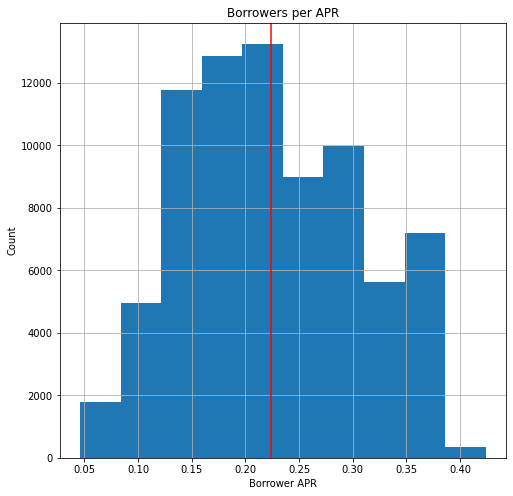

In [39]:
loan_sub['BorrowerAPR'].hist(figsize=(8,8))
plt.axvline(x=loan_sub.BorrowerAPR.mean(), color = 'red')
plt.title('Borrowers per APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count');


The Borrower APR  majority borrowers receiving an APR of around 0.23

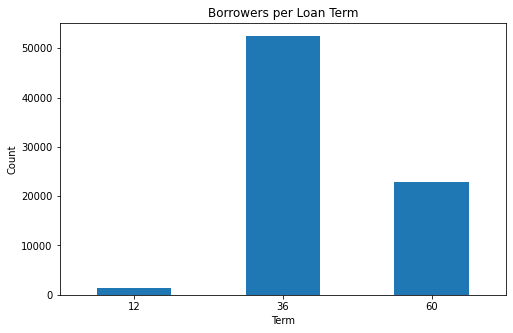

In [40]:
loan_sub['Term'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.xticks(rotation=0)
plt.title('Borrowers per Loan Term')
plt.xlabel('Term')
plt.ylabel('Count');

The 36 month loan has the highest number of borrowers.

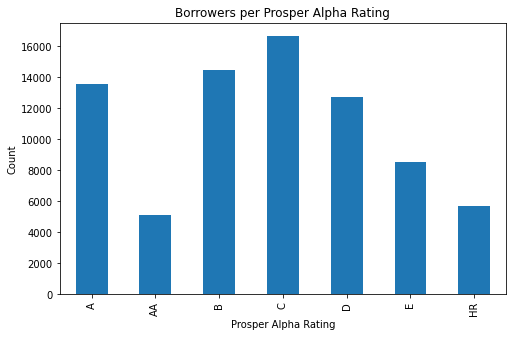

In [41]:
loan_sub['ProsperRating (Alpha)'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.title('Borrowers per Prosper Alpha Rating')
plt.xlabel('Prosper Alpha Rating')
plt.ylabel('Count');


Most of the borrowers have A, B, and C Prosper Ratings.

Text(0.5, 0, 'Borrower APR')

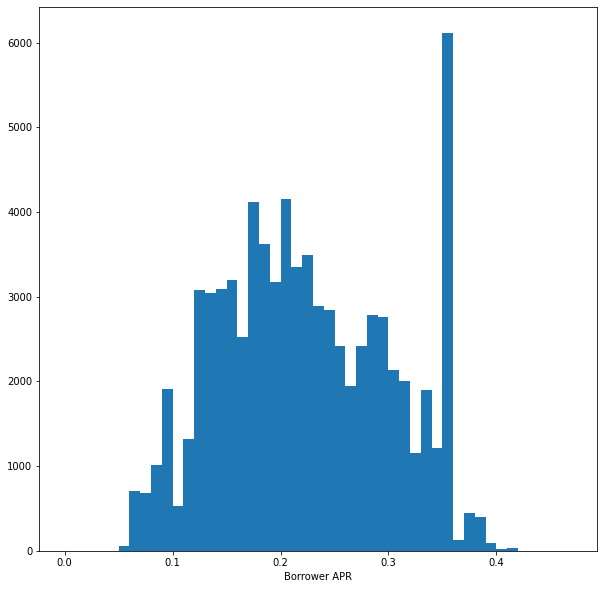

In [42]:
Bins = np.arange(0, loan_sub['BorrowerAPR'].max()+0.05, 0.01)
plt.figure(figsize=[10, 10])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = Bins);
plt.xlabel('Borrower APR')

The insignificant peak centered at 0.1 and 0.3, and a larger one at 0.2. Furthermore, it is obvious that only a few loans have an APR greater than 0.4.

Text(0.5, 0, 'DebtToIncomeRatio')

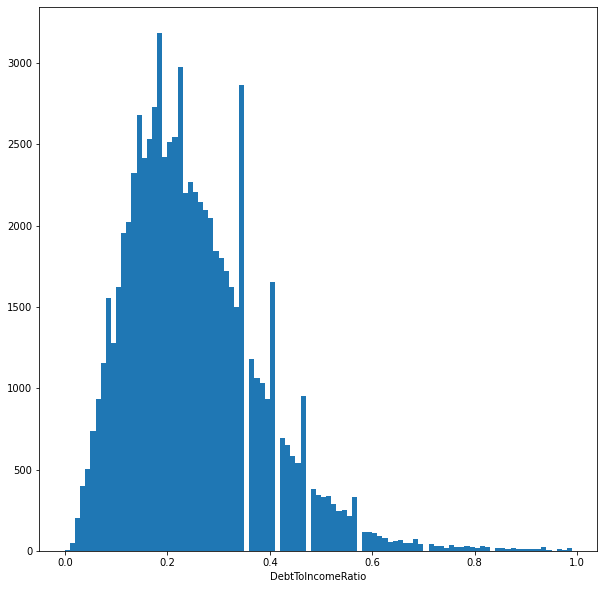

In [43]:
Bins = np.arange(0,1, 0.01)
plt.figure(figsize=[10, 10])
plt.hist(data = loan_sub, x = 'DebtToIncomeRatio', bins = Bins)
plt.xlabel('DebtToIncomeRatio')

The majority of the people would rather a 1:4 ratio of debt to income

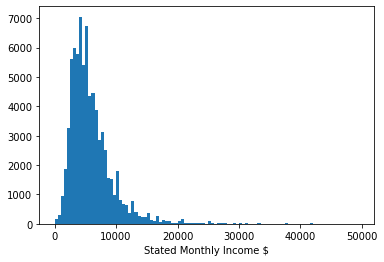

In [44]:
# A distribution of the monthly income; which is another variable of interest
Bins = np.arange(0, 50000, 500)
plt.hist(data=loan_sub, x='StatedMonthlyIncome', bins=Bins);
plt.xlabel('Stated Monthly Income $');

Text(0.5, 0, 'Original Loan Amount $')

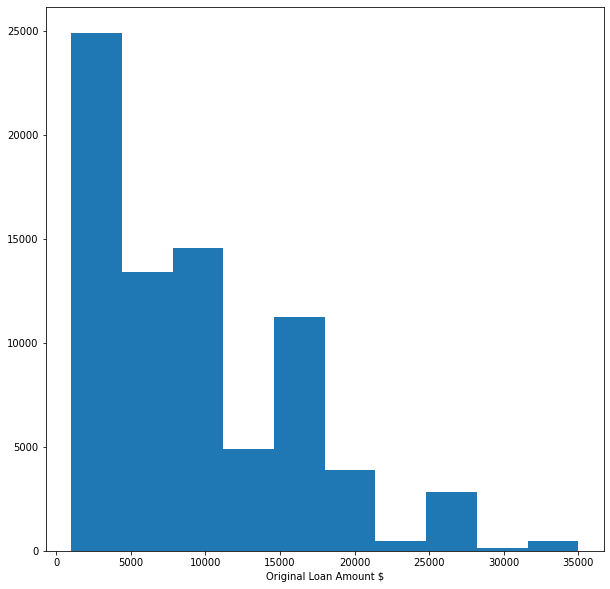

In [45]:
# histogram of the original loan amount; which is the first predictor variable of interest
plt.figure(figsize=[10, 10])
plt.hist(loan_sub.LoanOriginalAmount)
plt.xlabel('Original Loan Amount $')

The distribution above shows that most of the loans are multiples of 5000 since the larger frequencies are at 10000, 15000, 20000...

### Were there any unusual points or was there a need to perform any transformations?
The Borrower APR plot didn't seem to have any unusual points, this I did not need to perform any transformations to the data or chart.


### Of the features investigated, were there any unusual distributions?
The distributions of State Monthly Income and Debt To Income Ratio are highly right skewed.


<a id='be'></a>
<br><br>
## Bivariate Exploration

the correlation between the variable on interest (Borrower APR) and the corresponding predictor variables in separate bivariate plots.

In [46]:
#the features to be correlated 
features= ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio']

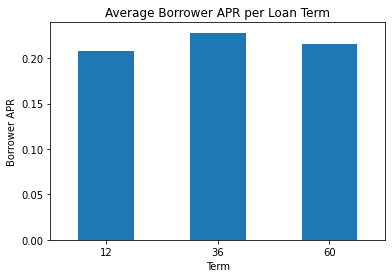

In [47]:

#Investigating APR in correlation to term of loan
loan_sub.groupby('Term')['BorrowerAPR'].mean().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.title('Average Borrower APR per Loan Term')
plt.ylabel('Borrower APR');

The 36 month term loan seems to have slightly higher borrower APR than the 12 and 60 month loans.

In [48]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76767 entries, 1 to 105382
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   LoanOriginalAmount         76767 non-null  int64   
 1   TotalTrades                76767 non-null  int64   
 2   Occupation                 75493 non-null  object  
 3   IsBorrowerHomeowner        76767 non-null  bool    
 4   TotalInquiries             76767 non-null  int64   
 5   CreditScoreRangeLower      76767 non-null  float64 
 6   CreditScoreRangeUpper      76767 non-null  float64 
 7   BorrowerAPR                76767 non-null  float64 
 8   StatedMonthlyIncome        76767 non-null  float64 
 9   Term                       76767 non-null  int64   
 10  ProsperRating (Alpha)      76767 non-null  object  
 11  IncomeRange                76767 non-null  object  
 12  DebtToIncomeRatio          76767 non-null  float64 
 13  ListingCategory (numeric)  767

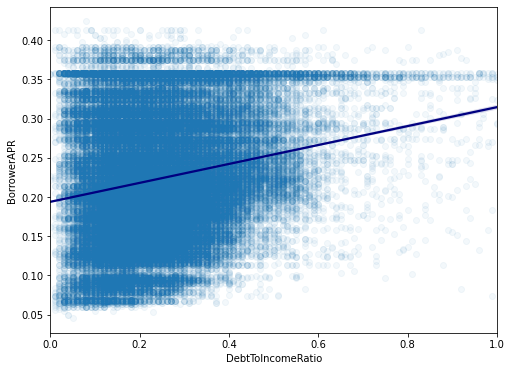

In [49]:
#Scatter plot of borrower APR vs borrowers with debt to income ratio of less than one
plt.figure(figsize = [8, 6])
test_less = loan_sub.query('DebtToIncomeRatio <= 1')
sns.regplot(x="DebtToIncomeRatio", y="BorrowerAPR", data=test_less, scatter_kws={'alpha':0.05}, line_kws={'color': 'navy'});

 Used transparency when the vast amount of data in this chart, to make the scatter more readable. The distribution of Debt To Income Ratio vs Borrower APR has a positive correlation for borrowers with a Debt to Income Ratio of <=1.

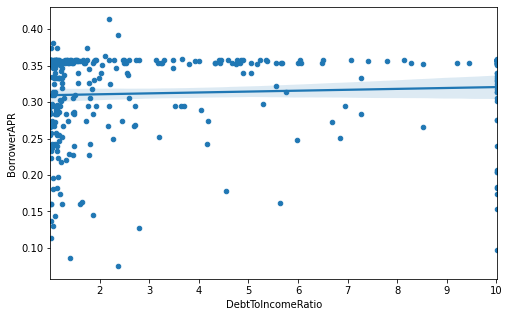

In [50]:
#Scatter plot of BorrowerAPR vs borrowers with debt to income ratio of more than one
test_more = loan_sub.query('DebtToIncomeRatio > 1')
test_more.plot.scatter(x='DebtToIncomeRatio', y='BorrowerAPR', figsize = (8,5))
plt.xticks(np.arange(1, 11, step=1.0))
plt.yticks(np.arange(0, .5, step=0.05))
sns.regplot(x="DebtToIncomeRatio", y="BorrowerAPR", data=test_more, scatter_kws={'alpha':0.03});

In [51]:
test_more['intercept'] = 1

lm = sm.OLS(test_more['DebtToIncomeRatio'], test_more[['intercept', 'BorrowerAPR']])
results = lm.fit()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<br><br><br>
## The way the features of interest varied with other features in the dataset:
Significant correlations between Prosper Rating, Income Range, and Debt to Income Ratio(<=1) with Borrower APR .

The lower the Prosper Rating, the higher the APR, which makes sense because these borrowers are viewed as more of a risk.

There is a negative correlation between APR and mean credit score, ie, the lower the credit score, the higher the APR, which makes sense because a higher credit score means there is less risk involved.
<br>

## Observation of any interesting relationships between the other features that are not the main features of interest:


There was a high degree of standard error with the Debt to Income Ratio (>1) vs. APR data, using this data alone would not create accurate results.



<a id='me'></a>
<br><br><br>
## Multivariate Exploration
The correlation between categorical variables (Prosper Rating, Income Range, Homeownership) with the Debt to Income Ratio and Mean Credit Score.

In [52]:
loan_sub.head()

,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,ListingCategory (numeric),EmploymentStatus
1,10000,29,Professional,False,5,680.0,699.0,0.12016,6125.000000,36,A,"$50,000-74,999",0.18,2,Employed
3,10000,26,Skilled Labor,True,1,800.0,819.0,0.12528,2875.000000,36,A,"$25,000-49,999",0.15,16,Employed
4,15000,39,Executive,True,9,680.0,699.0,0.24614,9583.333333,36,D,"$100,000+",0.26,2,Employed
5,15000,47,Professional,True,2,740.0,759.0,0.15425,8333.333333,60,B,"$100,000+",0.36,1,Employed
6,3000,16,Sales - Retail,False,0,680.0,699.0,0.31032,2083.333333,36,E,"$25,000-49,999",0.27,1,Employed


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


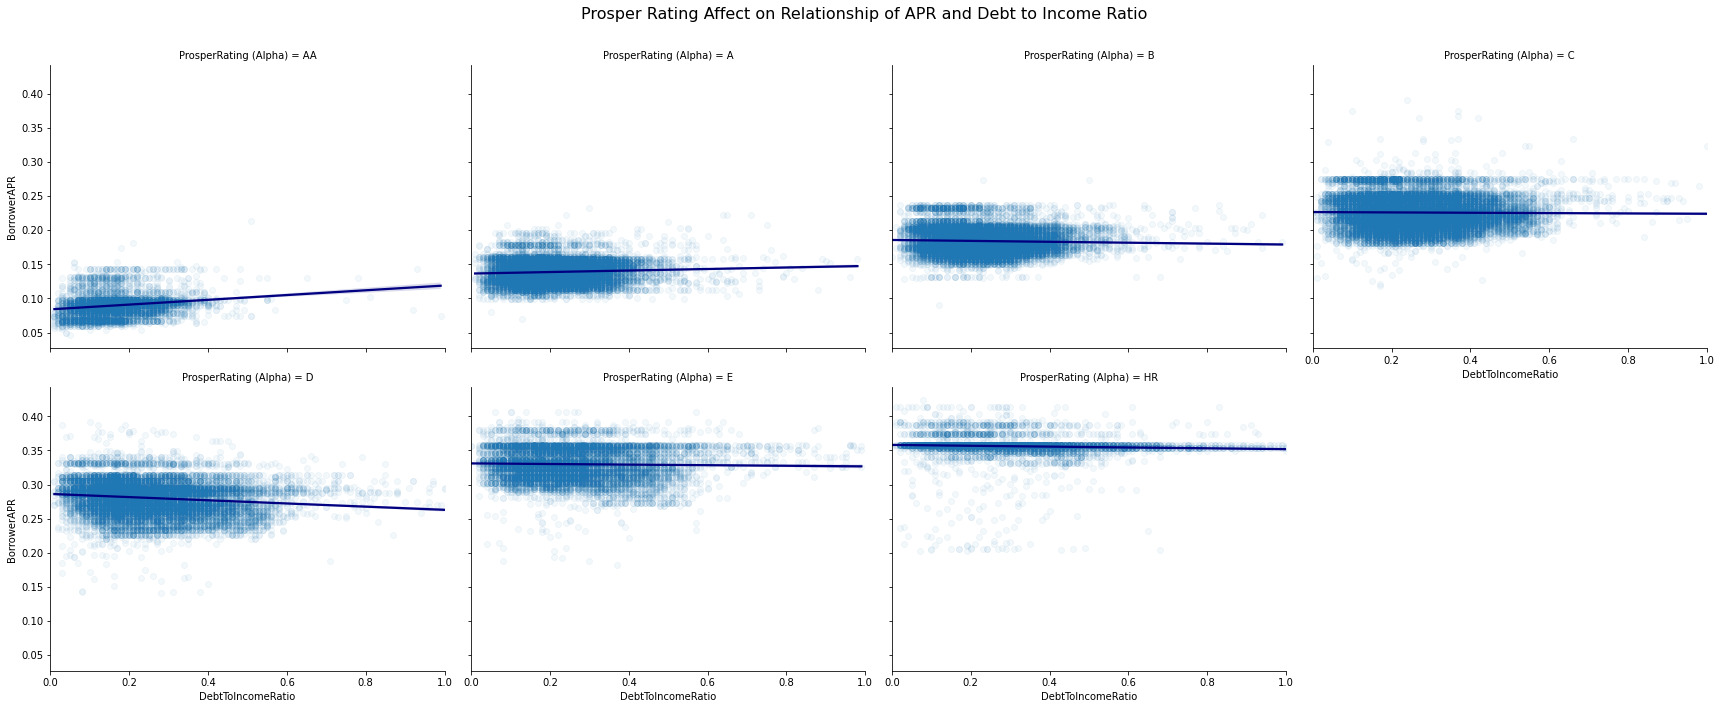

In [54]:
# Prosper Rating effect on relationship of APR and Debt to Income Ratio
g=sns.FacetGrid(data=test_less, aspect=1.2, size=5, col='ProsperRating (Alpha)', col_order=["AA", "A", "B", "C", "D", "E", "HR"], col_wrap=4)
g.map(sns.regplot, 'DebtToIncomeRatio', 'BorrowerAPR', scatter_kws={'alpha':0.05}, line_kws={'color': 'navy'})
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prosper Rating Affect on Relationship of APR and Debt to Income Ratio', fontsize=16)
g.add_legend();

Borrower APR seems to increase as Prosper Rating declines. Interestingly, the correlation between debt to income ratio and APR The negative/zero correlations seem to start at the 'B' Prosper Ratings. This could be due to a lack of loans being given to borrowers with a debt to income ratio exceeding 0.5.

In [55]:
#Combined lower & upper
loan_sub['MeanCreditScore'] = loan_sub[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].mean(axis=1)
loan_sub = loan_sub.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis=1)
loan_sub


,LoanOriginalAmount,TotalTrades,Occupation,IsBorrowerHomeowner,TotalInquiries,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),IncomeRange,DebtToIncomeRatio,ListingCategory (numeric),EmploymentStatus,MeanCreditScore
1,10000,29,Professional,False,5,0.12016,6125.000000,36,A,"$50,000-74,999",0.18,2,Employed,689.5
3,10000,26,Skilled Labor,True,1,0.12528,2875.000000,36,A,"$25,000-49,999",0.15,16,Employed,809.5
4,15000,39,Executive,True,9,0.24614,9583.333333,36,D,"$100,000+",0.26,2,Employed,689.5
5,15000,47,Professional,True,2,0.15425,8333.333333,60,B,"$100,000+",0.36,1,Employed,749.5
6,3000,16,Sales - Retail,False,0,0.31032,2083.333333,36,E,"$25,000-49,999",0.27,1,Employed,689.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105378,10000,37,Food Service Management,True,0,0.22354,4333.333333,36,C,"$50,000-74,999",0.13,1,Employed,709.5
105379,2000,39,Professional,True,4,0.13220,8041.666667,36,A,"$75,000-99,999",0.11,7,Employed,709.5
105380,10000,25,Other,True,2,0.23984,2875.000000,60,D,"$25,000-49,999",0.51,1,Employed,709.5
105381,15000,19,Food Service,True,4,0.28408,3875.000000,60,C,"$25,000-49,999",0.48,2,Full-time,689.5


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


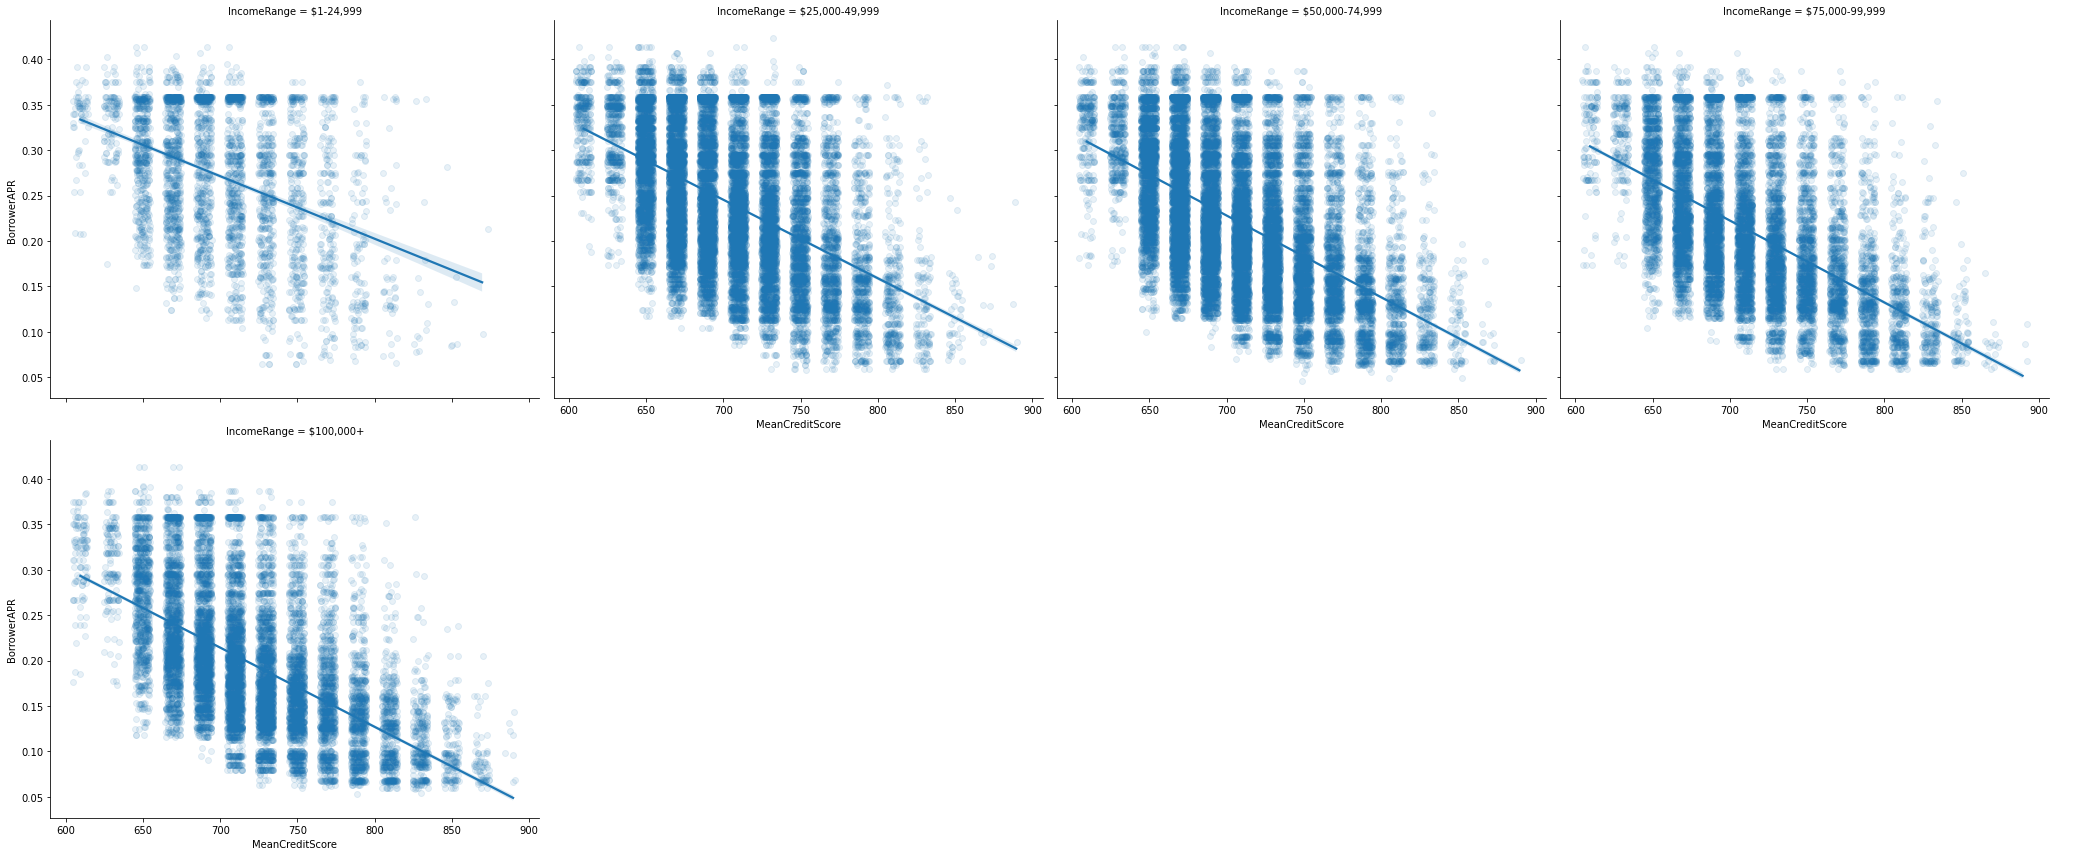

In [56]:
# Income Range effect on relationship of APR and Mean Credit Score
g=sns.FacetGrid(data=loan_sub, aspect=1.2, size=6, col='IncomeRange', col_order=["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], col_wrap=4)
g.map(sns.regplot, 'MeanCreditScore', 'BorrowerAPR', x_jitter=5, scatter_kws={'alpha':0.1})
g.add_legend();


An Income Range $1-24,000 seems to have a slightly higher APR than the rest of the ranges.

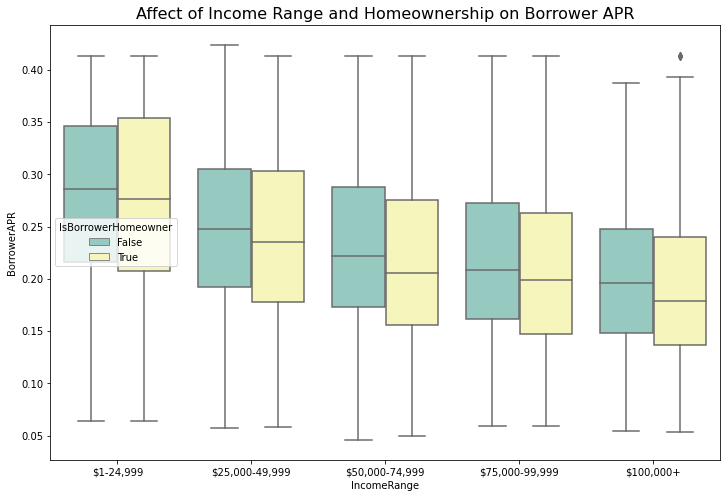

In [57]:
# Analyzing the effect of Income Range and Homeownership to Borrower APR.
plt.figure(figsize = [12, 8])
ax = sns.boxplot(x="IncomeRange", y="BorrowerAPR", hue="IsBorrowerHomeowner", data=loan_sub, order=["$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"], palette="Set3")
plt.title('Affect of Income Range and Homeownership on Borrower APR', fontsize=16);

The income range of 1-24,999 has a higher APR for homeowners than nonhomeowners.Starting at the 25,000 income range, APR is less for homeowners than nonhomeowners.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


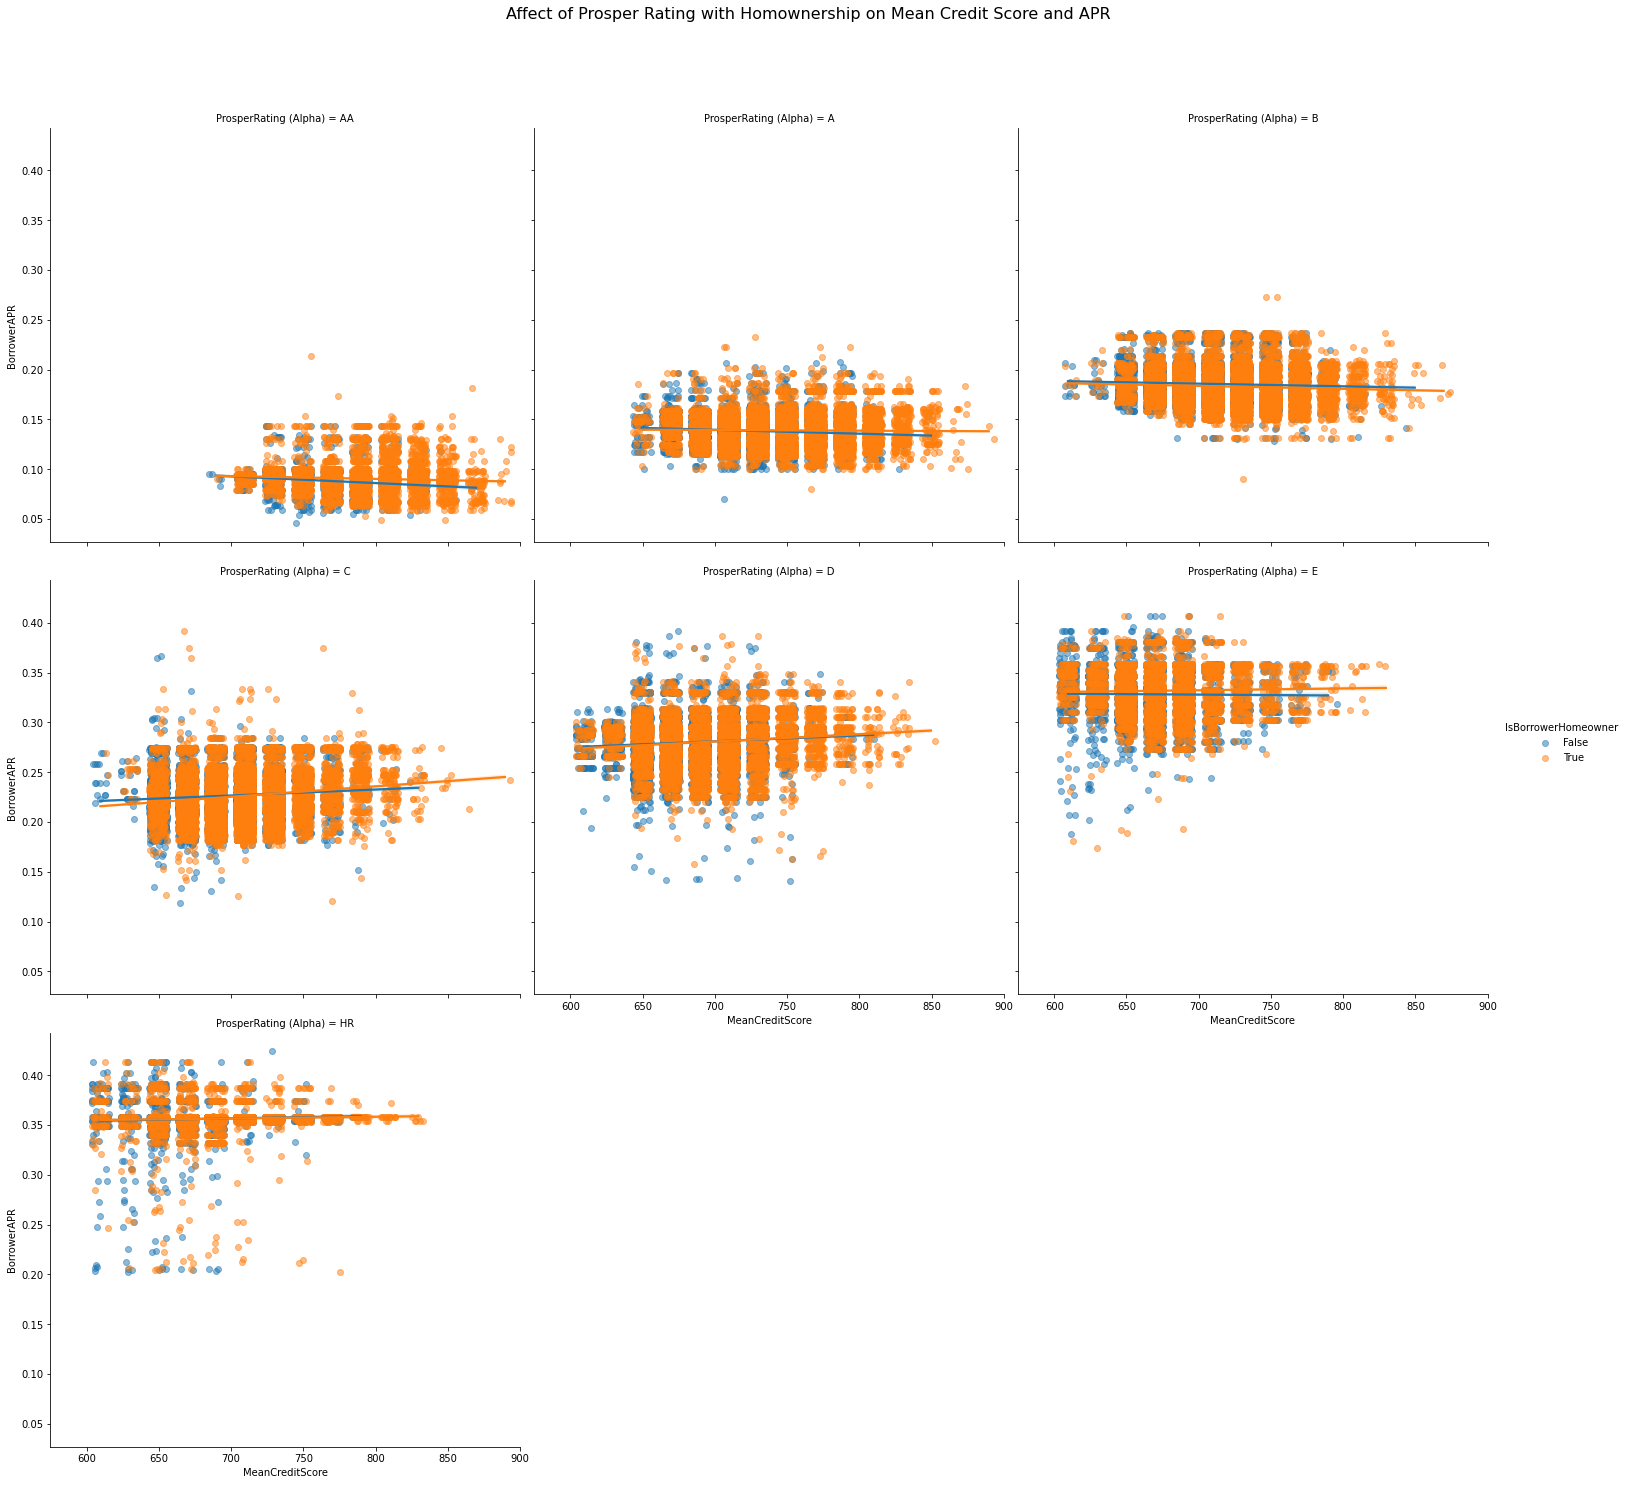

In [58]:
#Prosper Rating with Homeownership and the correlation to mean credit score and Borrower APR
g = sns.FacetGrid(data=loan_sub, col='ProsperRating (Alpha)', col_order=["AA", "A", "B", "C", "D", "E", "HR"], hue='IsBorrowerHomeowner', col_wrap=3, size=7);
g.map(sns.regplot, "MeanCreditScore", "BorrowerAPR", scatter_kws={'alpha':0.5}, fit_reg=True, x_jitter=6);
plt.subplots_adjust(top=0.9)
g.set(xlim=(575, 900))
g.fig.suptitle('Affect of Prosper Rating with Homownership on Mean Credit Score and APR', fontsize=16)
g.add_legend();

Higher prosper ratings ("AA" .. "B") have a negative or zero correlation between mean credit score and Borrower APR. The lower prosper ratings ("C" .. "HR") tend to have a positive or zero correlation between mean credit score and Borrower APR.

<br><br><br>
## The features that strengthened each other in terms of looking at the features of interest:
The income range of 1-24,000 has a high probability of increased APR, even with homeownership. Starting with the income of 25,000 the APR decreases as the income range increases, with homeowners having a slightly lower APR than non homeowners.
<br>

## The interesting or surprising interactions between features:
The regression between Mean Credit Score with Prosper Rating on Borrower APR revealed that higher prosper ratings produced a negative or zero correlation . This makes sense because the higher the credit score, the lower the APR would be. However, starting at the "C" prosper rating, the trend starts to shift to a more zero or positive correlation ie, the higher the credit score, the higher the APR.